In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

import numpy as np
from matplotlib.colors import SymLogNorm, LogNorm
from astropy.coordinates import SkyCoord
from scipy import ndimage
#from HAWCplot import HAWC_footprint
#from IPython.display import display, Math, Latex #For Latex math symbols

import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

file1 = './current_fits/F0450_HA_POL_unk5_HAWDHWPD_PMP_043-118.fits'

%matplotlib notebook

In [2]:
polfile=fits.open(file1)
w2=wcs.WCS(polfile[0].header)
xpix=polfile[0].header['NAXIS1']
ypix=polfile[0].header['NAXIS2']
pol = polfile[8].data
data1 = polfile[0].data
polvec = polfile[11].data
rotate=True  # true to make the historgram within bound -90 to 90.
equal_pix = True  # true to create bins with equal pix
log_spaced = False # true to create log-spaced bins
manual = False # true to enter bins manually
bins = 5  # no. of bins 

<IPython.core.display.Javascript object>


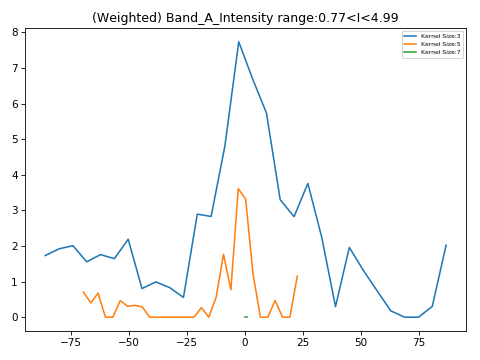

222
31
0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


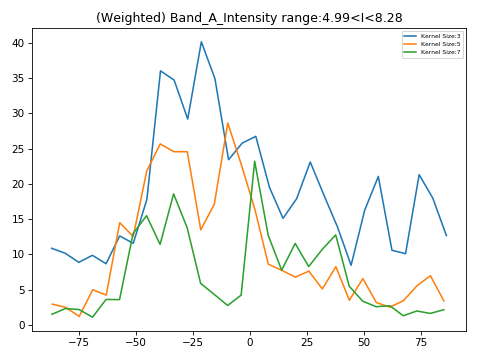

1403
810
493


C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


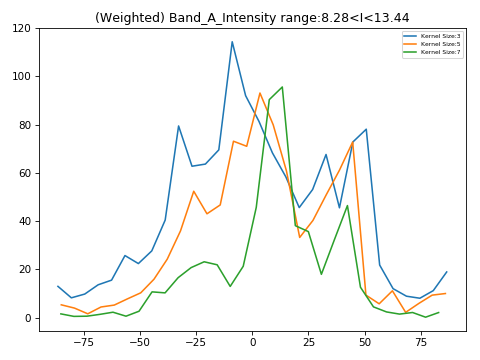

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


1524
1120
631


<IPython.core.display.Javascript object>


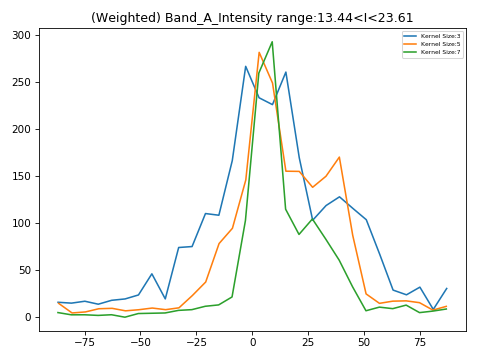

1622
1224
783


C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


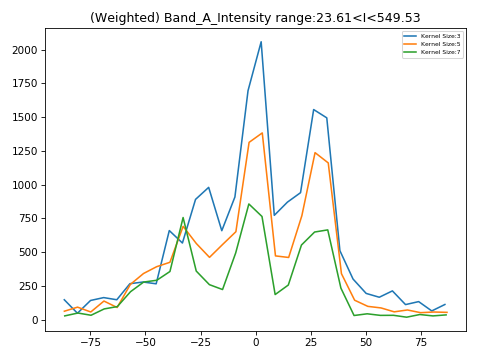

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


2059
1744
1261


In [3]:
data2 = data1.copy()
data4 = data2[np.where(np.isnan(data2) == False)]
data5 = np.sort(data4)

# to create bins with equal number of pixels
if equal_pix == True:
    lis = []
    for i in range(bins):
        if i == 0:
            lis.append(np.nanmin(data1))
        if i == bins-1:
            lis.append(np.nanmax(data1))
        else:
            lis.append(data5[(len(data5)//bins)*(i+1)])

# to create log-spaced bins
if log_spaced==True:
    lis = np.logspace(np.log10(np.nanmin(data1)), np.log10(np.nanmax(data1)), 4)

# to enter bins maunally
if manual ==True:
    lis = [] # enter 


#plt.figure()
for i in range(len(lis)-1):  # plots HRO for different intensity bins
    plt.figure()
    sig = np.nanstd(pol)   
    m = np.where(pol < 3*sig)  # for chooping out the data that is greater than 3 std in polarization
    for j in np.arange(3, 8, 2):  # for changing the kernel
        
        polang1 = polfile[11].data  
        deriv_0 = ndimage.gaussian_filter1d(data2,j,axis=0,order=1)  # calcualting derivative along x-axis
        deriv_1 = ndimage.gaussian_filter1d(data2,j,axis=1,order=1) # calculating derivative along y-axis
        grad = np.sqrt(deriv_0**2 + deriv_1**2)  
        angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
        
        # masking out the data where it is less than 3 std
        grad = grad[m]
        angle = angle[m]
        polang1 = polang1[m]
        data3 = data2.copy()
        data3 = data3[m]
        
        # creating a mask for data within the certain intenity range
        m1 = np.where((data3 >= lis[i]) & (data3 <= lis[i+1]))
        angle = angle[m1]
        grad = grad[m1]
        polang1 = polang1[m1]
        dphi = polang1 - angle

        # creating mask to remove nans
        m2 = np.where(np.isnan(dphi) == False)
        dphi = dphi[m2]
        grad = grad[m2]
        print(len(grad))
        
         # to set the range of the angle between -90 and 90
        dphi[np.where(dphi < -90)] += 180
        dphi[np.where(dphi > 90)] -= 180
    
        # to rotate the vector by 90 so that the 0 corresponds to magnetic field aligned with filament. 
        if rotate is True:
            dphi += 90
            dphi[np.where(dphi > 90)] -= 180
        
        # plotting the histogram
        hist1, bins1 = np.histogram(dphi, bins = 30, weights = grad)
        center1 = (bins1[:-1] + bins1[1:]) / 2
        plt.plot(center1,hist1, label = "Kernel Size:" + str(j))
        plt.legend(fontsize = "xx-small")
        #print(len(dphi))
        plt.show()
        #plt.title("Center")
        
    # to automatically change the title of the plots
    plt.title("(Weighted) Band_A_Intensity range:" +
              str('{0:.2f}'.format(lis[i])) +
              "<" + "I" + "<" + str('{0:.2f}'.format(lis[i+1])))
    plt.show()
    plt.tight_layout()
    #plt.savefig("band_A_equalpix_weighted" + str('{0:.2f}'.format(log_spaced[i+1])) + ".pdf")

<IPython.core.display.Javascript object>


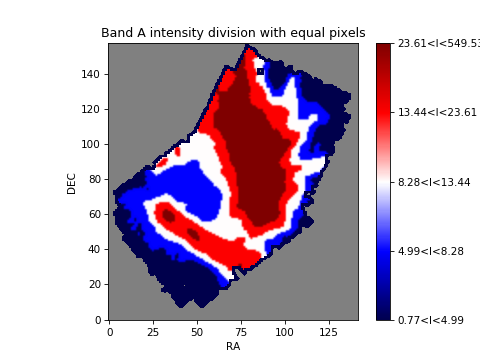

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in less_equal


In [7]:
# for creating a colormap for different intensity bins

data4 = data1.copy()
fig, ax = plt.subplots()

# setting the background gray
cmap = plt.cm.seismic  
cmap.set_bad('Gray',1.)

labels = []
for i in range(len(lis)-1):
    x = str('{0:.2f}'.format(lis[i])) + "<" + "I" + "<" + str('{0:.2f}'.format(lis[i+1]))
    labels.append(x)
    
# loop to create a mask of the data with certain value representing a bin with equal pixel
tick_data = []
for i in range(len(lis)-1):
    data4[np.where((data1 >= lis[i]) &
                   (data1 <= lis[i+1]))] = np.nanmax(data1)*(2+i)
    tick_data.append(np.nanmax(data1)*(2+i))

# plotting the mask of the data
cax = ax.imshow(data4, origin='lower',interpolation='gaussian',cmap=plt.cm.seismic)
ax.set_title("Band A intensity division with equal pixels")
ax.set_xlabel("RA")
ax.set_ylabel("DEC")

# to set the colorbar with ticks
cbar = fig.colorbar(cax, ticks=tick_data)
cbar.ax.set_yticklabels(labels)
#fig.savefig('Colormap_A_equipix.pdf')

In [13]:
data2 = data1.copy()
data2 = data2[np.where(np.isnan(data2) == False)]

In [15]:
data2.shape

(11304,)

In [16]:
11304/5

2260.8

In [18]:
2260.8

2260.8

In [39]:
l = np.where((data1 > 25)) #& (data1 < 25))
l[0].shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


(2093,)

In [4]:
np.nanmin(data1), 5, 8.5, 14, 25, np.nanmax(data1)

(0.76824074314864821, 5, 8.5, 14, 25, 549.52626894947923)

In [5]:
lis

[0.76824074314864821,
 4.9850550788300731,
 8.2792629769535058,
 13.436060838264289,
 23.614442499821575,
 549.52626894947923]